# Lab assignment 1



In [1]:
# import the necessary libraries
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option("display.width", 500)
pd.set_option("display.max_columns", 100)
pd.set_option("display.notebook_repr_html", True)
import seaborn as sns

## Iris dataset

We are going to use the clasical Iris dataset do demonstrate the influence of different design choices on learned weight matrix norm and the resulting decision function. We restrain these experiments to use 2 features only in order to allow 2D visualisation of the decision boundaries.

### Load data

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

In [3]:
# list(iris.keys())

In [4]:
# print(iris.DESCR)

### Select 2 features

In [5]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

## Train a multinomial logistic regression with sklearn

In [6]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(
    multi_class="multinomial", solver="lbfgs", C=10, random_state=42
)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

### Useful code snipets
#### Plotting the decision boundaries
Code for contour plots is taken from [A. Géron's notebooks](https://github.com/ageron/handson-ml2) for his book ["Hands-on machine learning with Scikit-learn, Keras & Tensorflow"](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/).

(0.8, 8.0, 0.0, 4.0)

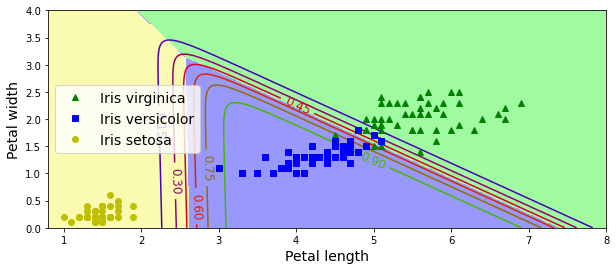

In [7]:
class_id = 1
lim_x0 = 0.8, 8
lim_x1 = 0, 4
x0, x1 = np.meshgrid(
    np.linspace(*lim_x0, 500).reshape(-1, 1),
    np.linspace(*lim_x1, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, class_id].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([*lim_x0, *lim_x1])

**Suggestion**: create a function to reproduce this contour plot easily. You will need it often thougout this assignment.

#### Frobenius norm of the weight matrix

In [8]:
(softmax_reg.coef_ ** 2).mean()

11.614218891612557

#### L2 norm of the weight vector per class

In [9]:
(softmax_reg.coef_ ** 2).mean(axis=1)

array([13.02806494,  2.34269004, 19.47190169])

In [10]:
def plot_decision_function(X, y, classifier, class_id=1):
    pass

In [11]:
def plot_decision_function(X, y, softmax_reg, class_id=1):
    lim_x0 = 0, 8
    lim_x1 = 0, 4
    x0, x1 = np.meshgrid(
        np.linspace(*lim_x0, 500).reshape(-1, 1),
        np.linspace(*lim_x1, 200).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_proba = softmax_reg.predict_proba(X_new)
    y_predict = softmax_reg.predict(X_new)

    zz1 = y_proba[:, class_id].reshape(x0.shape)
    zz = y_predict.reshape(x0.shape)

    plt.figure(figsize=(10, 4))
    plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
    plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
    plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

    from matplotlib.colors import ListedColormap

    custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
    plt.clabel(contour, inline=1, fontsize=12)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="center left", fontsize=14)
    plt.axis([*lim_x0, *lim_x1])
    plt.title("weight norm:" + str((softmax_reg.coef_ ** 2).mean(axis=1)))

### Exercise: qualitative analysis of regularization
Study the decision boundary of logistic regression under different regularization strengths.
1. Check the documentation for [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) on sklearn's documentation.
1. Identify the parameter corresponding to the regularization.
    1. Is it directly or inversely related to regularization strentgh?
    1. What is the possible range for this hyperparameter?
1. Try different values (at least 3) of regularization and observe the effect on the norm of the weights and the decision function.
    1. What is the observed relationship between weight norm and regularization?
    1. Is the weight norm directly correlated to sharper or smoother decision functions?

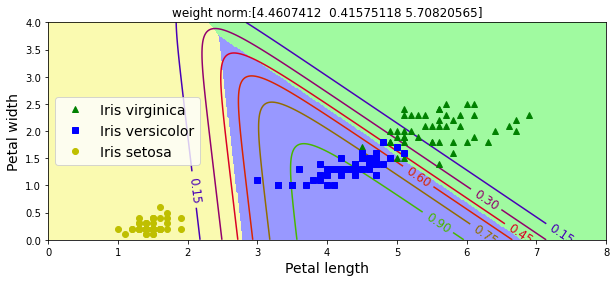

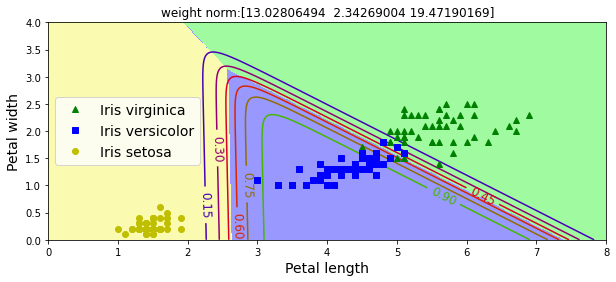

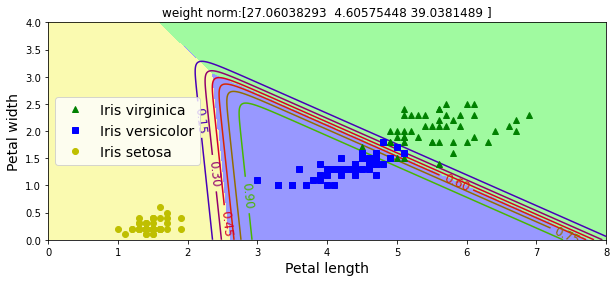

In [12]:
for C in [1, 10, 100]:
    softmax_reg.set_params(C=C)
    softmax_reg.fit(X, y)
    plot_decision_function(X, y, softmax_reg)

## Alternative to multinomial: one-versus-rest logistic regression
Whe using the multinomial regression, we treat the multi-class problem by modeling all classes together.
Another approach to tackle multi-class classification is to learn a binary classifier for each class. For the final prediction, whichever classifiers predicts the highest confidence "wins". This approach is known as one-versus-all or one-versus-rest.

You can implement this strategy by setting `multi_class="ovr`.

In [13]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", C=10, random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10, multi_class='ovr', random_state=42)

### Exercise: decision boundaries for OVR multi-class logistic regression
1. Plot the contours of the decision function for each of the 3 classes and compare to the multinomial classifier. 
1. What main difference do you observe in the contours of the predicted probabilities?

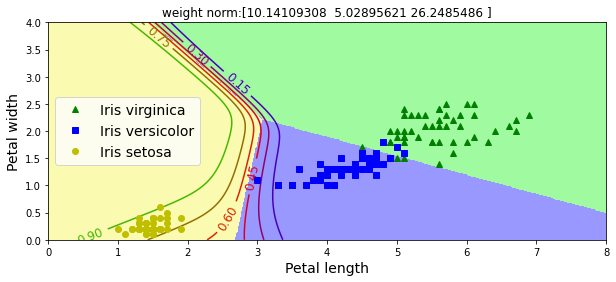

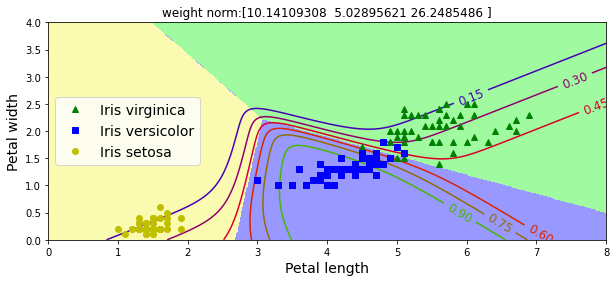

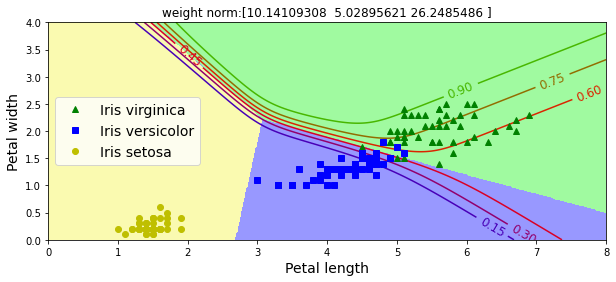

In [14]:
for c_id in range(3):
    plot_decision_function(X, y, log_reg, class_id=c_id)

In [15]:
log_reg.predict_proba(X).shape

(150, 3)

## Implementing OVR logistic regression using SGDClassifier
The `SGDClassifier` module can be used to implement logistic regression by setting its loss function accordingly:

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_cls = SGDClassifier(
    loss="log",
    max_iter=1000,
    tol=1e-3,
    learning_rate="constant",
    penalty=None,
    eta0=0.1,
    random_state=42,
)
sgd_cls.fit(X, y)

SGDClassifier(eta0=0.1, learning_rate='constant', loss='log', penalty=None,
              random_state=42)

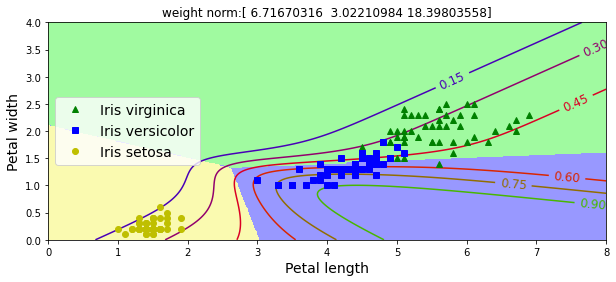

In [17]:
plot_decision_function(X, y, sgd_cls)

### Exercise: Regularization and SGD
1. Implement SGDClassifier the same way as before but adding L2 regularization. 
    1. Identify the regularization parameter by reading the doc of [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
    1. Which is the convergence criteria used?
    1. Which parameters are involved in adjusting the learning rate?
1. Test different values for the regularization parameter while observing:
    1. Decision function
    1. Weight matrix norm
    1. Number of iterations until convergence
    1. Miscassified samples
1. Which relationships do you observe between these metrics and regularization strenght? 
    1. Can you formulate hypothesis to explain your observations? In other words, can you imagine possible reasons that justify the observed behavior?
    1. Can you think of other metrics you could observe to enforce or invalidate your hypothesis?


29
27
18


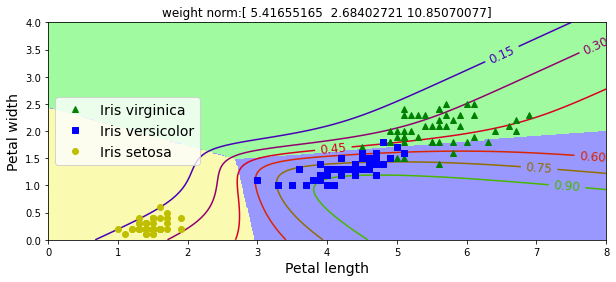

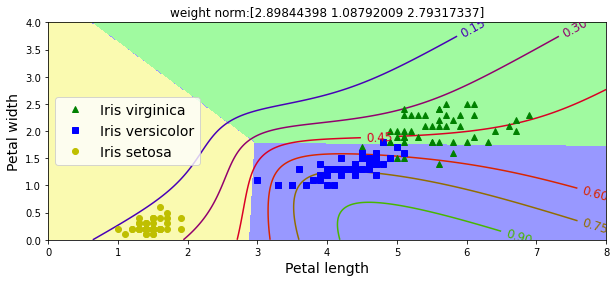

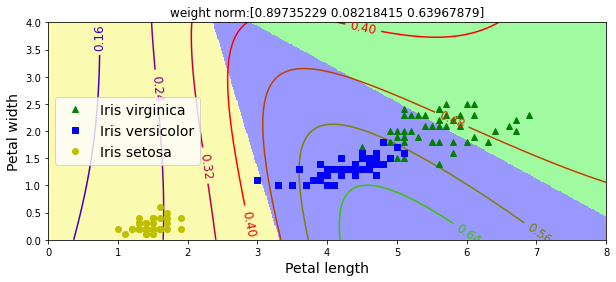

In [18]:
for alpha in [1e-3, 1e-2, 0.1]:
    sgd_cls.set_params(penalty="l2", alpha=alpha)
    sgd_cls.fit(X, y)
    plot_decision_function(X, y, sgd_cls)
    print(sgd_cls.n_iter_)

### Exercise: feature standardization and regularized SGD convergence
1. Build a pipeline including feature standardization prior to SGD training
    - Tip: Use `make_pipeline` from `sklearn.pipeline`
1. Observe the number of iterations taken to convergence and compare it to the previous non-standardized case.
    - Tip: use the pipeline's `named_steps` property to navigate to SGDClassifier's `n_iter_` attribute.
1. Repeat your experiment for different starting points 
    - Tip: weights are initialized randomly, so you need to change the source of randomness...
    1. Did your initial observation generalize to other initial points?
    1. Repeat the experiment removing regularization. Do you observe the same difference in convergence?
**Suggestion**: you can use violin plots (`plt.violinplot` or `sns.violinplot`) to visually compare the distributions of your observations under each condition.

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sgd_cls = SGDClassifier(
    loss="log",
    max_iter=1000,
    tol=1e-4,
    learning_rate="constant",
    penalty="l2",
    alpha=0.01,
    eta0=0.1,
    random_state=42,
)

pipe = make_pipeline(scaler, sgd_cls)

In [20]:
pipe.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.01, eta0=0.1, learning_rate='constant',
                               loss='log', random_state=42, tol=0.0001))])

In [21]:
pipe.named_steps["sgdclassifier"].n_iter_

27

#### L2 regularization

In [22]:
n_iter = []
n_iter_std = []
for seed in range(200):

    sgd_cls.set_params(random_state=seed)
    sgd_cls.fit(X, y)
    n_iter.append(sgd_cls.n_iter_)

    pipe.set_params(sgdclassifier__random_state=seed)
    pipe.fit(X, y)
    n_iter_std.append(pipe.named_steps["sgdclassifier"].n_iter_)

<AxesSubplot:>

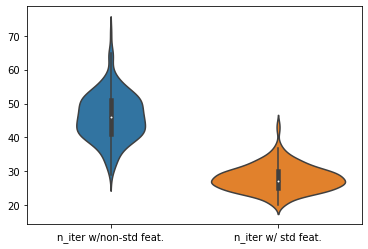

In [23]:
df = pd.DataFrame({"n_iter w/non-std feat.": n_iter, "n_iter w/ std feat.": n_iter_std})
sns.violinplot(data=df)

#### No regularization

In [24]:
n_iter = []
n_iter_std = []
for seed in range(200):
    sgd_cls.set_params(random_state=seed, penalty="none")
    sgd_cls.fit(X, y)
    n_iter.append(sgd_cls.n_iter_)

    pipe.set_params(sgdclassifier__random_state=seed, sgdclassifier__penalty="none")
    pipe.fit(X, y)
    n_iter_std.append(pipe.named_steps["sgdclassifier"].n_iter_)

<AxesSubplot:>

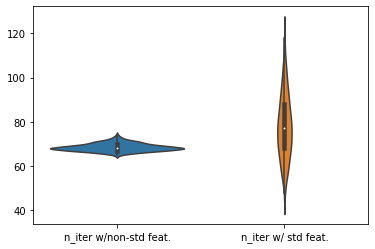

In [25]:
df = pd.DataFrame({"n_iter w/non-std feat.": n_iter, "n_iter w/ std feat.": n_iter_std})
sns.violinplot(data=df)